# Movie Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data from file seprated by tabs

In [2]:
column_names = ['user_id', 'item_id', "rating", "timeStamp"]
df = pd.read_csv("ml-100k/u.data", sep="\t", names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df['user_id'].nunique()

943

In [6]:
df = df.rename(columns={"item_id" : "movie_id"})

df.head()

,user_id,movie_id,rating,timeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df["movie_id"].nunique()

1682

In [8]:
movies_title = pd.read_csv("ml-100k/u.item", sep='\|', encoding = "ISO-8859-1", header=None)

movies_title.head()

/opt/homebrew/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
movies_title.shape

(1682, 24)

In [10]:
movies_title = movies_title[[0,1]]

movies_title.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
movies_title.columns = ["movie_id", "title"]
movies_title.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging both dataSet (df and movies_title) on movie_id

In [12]:
df = pd.merge(df, movies_title, on="movie_id")

df

,user_id,movie_id,rating,timeStamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [13]:
df = df[['user_id',	'movie_id',	'rating',	'timeStamp', 'title']]

df.head()

,user_id,movie_id,rating,timeStamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [14]:
df.tail()

,user_id,movie_id,rating,timeStamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# Exploratory Data Analysis

In [15]:
df.head(15)

,user_id,movie_id,rating,timeStamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [16]:
df.groupby("title").mean()

,user_id,movie_id,rating,timeStamp
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [17]:
df.groupby('title').count()

,user_id,movie_id,rating,timeStamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
...,...,...,...,...
Young Guns II (1990),44,44,44,44
"Young Poisoner's Handbook, The (1995)",41,41,41,41
Zeus and Roxanne (1997),6,6,6,6


For Recommendation purpose we above all features our required feature will be rating

In [18]:
# df.groupby('title').mean()['rating'].sort_values().head()

df.groupby('title').mean()['rating'].sort_values(ascending=False)


title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [19]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

creating a new table having feature name rating and no_of_rating

In [20]:
ratings = pd.DataFrame({"rating": df.groupby('title').mean()['rating'], "num_of_rating":df.groupby('title').count()['rating'] })

In [21]:
ratings

,rating,num_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [22]:
ratings.sort_values("num_of_rating")

,rating,num_of_rating
title,,
Á köldum klaka (Cold Fever) (1994),3.000000,1
Mille bolle blu (1993),1.000000,1
Mat' i syn (1997),1.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Man from Down Under, The (1943)",1.000000,1
...,...,...
Liar Liar (1997),3.156701,485
Return of the Jedi (1983),4.007890,507
Fargo (1996),4.155512,508


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


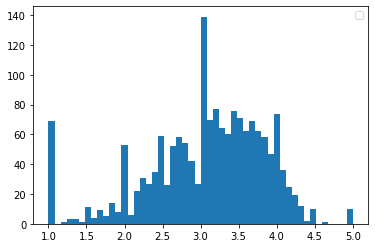

In [23]:
plt.hist(ratings['rating'], bins=50)
plt.legend()
plt.show()

In [24]:
ratings = ratings.rename(columns = {"num_of_rating":"no of rating"}) 

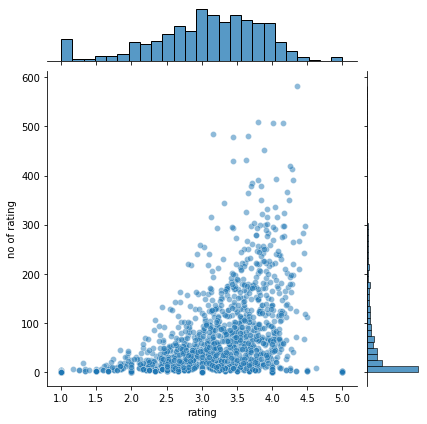

In [25]:
sns.jointplot(x= "rating", y='no of rating' , data=ratings, alpha=0.5)

# Creating Movie Recommendation

Now we have to create a matrix 
- At index we will have user_id
- At column we will have movie names (title)
- and inside table we will arrange the rating given by user to that particular movie

In [26]:
df.head()

,user_id,movie_id,rating,timeStamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [27]:
movieMat = df.pivot_table(index="user_id", columns="title", values="rating")

movieMat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
ratings.sort_values('no of rating', ascending=False)

,rating,no of rating
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


As we can observe star Wars (1977) is the most rated movie so we will try to correlate its rating with respected user to differenet movies

In [35]:
starwar_user_rating = movieMat["Star Wars (1977)"]

starwar_user_rating

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [37]:
similar_to_starWar = movieMat.corrwith(starwar_user_rating)

similar_to_starWar

/opt/homebrew/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [41]:
corr_StarWar = pd.DataFrame(similar_to_starWar, columns=['correlation'])
corr_StarWar.dropna(inplace=True)


corr_StarWar

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [43]:
corr_StarWar.sort_values('correlation', ascending=False)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


### As we know no movie is totally correlated with eachOther 
- maybe the no of user for the movie with 1.0 value correaltion are very less

In [44]:
ratings

,rating,no of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [45]:
corr_StarWar = corr_StarWar.join(ratings['no of rating'])

corr_StarWar

,correlation,no of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


We will select only movie having rated by more than 100 users and are correlated with star Wars

In [46]:
corr_StarWar[corr_StarWar['no of rating'] > 100].sort_values("correlation", ascending=False)

,correlation,no of rating
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## Predict Funtion

In [47]:
def predictMovie(movieName):
    movie_user_rating = movieMat[movieName]
    similar_to_movie = movieMat.corrwith(movie_user_rating)

    corr_movie = pd.DataFrame(similar_to_movie, columns=['correlation'])
    corr_movie.dropna(inplace=True)

    corr_movie = corr_movie.join(ratings['no of rating'])
    predictions = corr_movie[corr_movie['no of rating'] > 100].sort_values("correlation", ascending=False)

    return predictions   

In [48]:
prediction = predictMovie("Raiders of the Lost Ark (1981)")

/opt/homebrew/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [49]:
prediction.head()

,correlation,no of rating
title,,
Raiders of the Lost Ark (1981),1.000000,420
Indiana Jones and the Last Crusade (1989),0.539606,331
"Empire Strikes Back, The (1980)",0.538659,367
Star Wars (1977),0.536117,583
Back to the Future (1985),0.506807,350
